[IPython Notebook](photodynam.ipynb) |  [Python Script](photodynam.py)

Comparing PHOEBE 2.0 vs Photodynam
============================

**NOTE**: Photodynam is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [photodynam](https://github.com/dfm/photodynam) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [10]:
%matplotlib inline

In [11]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.utils.get_basic_logger(clevel='INFO')

b = phoebe.Bundle.default_binary()
b['q'] = 0.7

In [12]:
b.add_dataset('LC', time=np.linspace(0,3,100), dataset='lc01')
b.add_dataset('RV', time=np.linspace(0,3,100), dataset='rv01')

<ParameterSet: 24 parameters | methods: RV, RV_dep>

In [13]:
b.set_value_all('pbscale', 'pblum')
# TODO: remove this once support for coupled pblums is added for the jktebop backend

In [14]:
b.set_value_all('ld_coeffs', [0.,0.])
# TODO: remove this once tested to work correctly with limbdarkening

The photodynam backend only support linear limb-darkening.  If we weren't to change ld_func to linear, then it would completely ignore the ld_coeffs set in the system - and then we wouldn't /really/ be comparing the same thing.

In [15]:
b.set_value_all('ld_func', 'linear')

Running Compute
-----------------------

We'll compare to dynamical RVs from PHOEBE 2 since photodynam does not support the ability for flux-weighted RVs

In [16]:
b.add_compute(compute='phoebe', rv_method='dynamical')

<ParameterSet: 19 parameters | qualifiers: dynamics_method, eclipse_alg, gridsize, stepsize, lc_method, atm, enabled, ltte, rv_grav, orbiterror, rv_method, etv_method, maxpoints, delta, etv_tol, store_mesh, distortion_method, subdiv_num, mesh_method>

Now we add compute options for the 'photodynam' backend.

In [17]:
b.add_compute('photodynam', compute='pd')

<ParameterSet: 3 parameters | qualifiers: orbiterror, stepsize, enabled>

In [18]:
b.run_compute(compute='phoebe', model='phoebemodel')

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:10: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull,

<ParameterSet: 6 parameters | methods: RV, LC>

In [19]:
b.run_compute(compute='pd', model='pdmodel')

<ParameterSet: 6 parameters | methods: RV, LC>

Plotting
-------------------------

**NOTE [BUG]:** currently we add +1 to the output fluxes from photodynam in order to reach agreement - not sure why yet

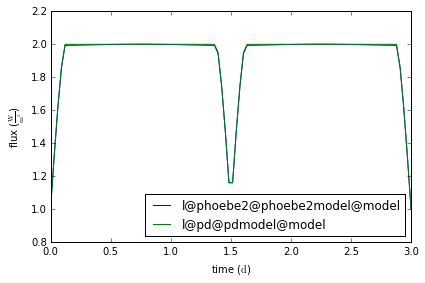

In [20]:
axs, artists = b['lc01@phoebemodel'].plot()
axs, artists = b['lc01@pdmodel'].plot()
leg = plt.legend(loc=4)

Now let's plot the residuals between these two models

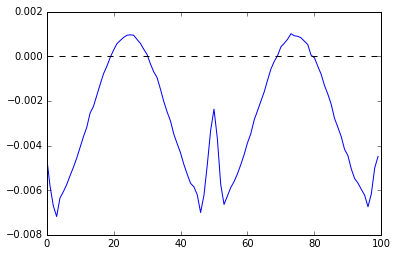

In [21]:
artist, = plt.plot(b.get_value('flux@lc01@phoebemodel') - b.get_value('flux@lc01@pdmodel'))
artist = plt.axhline(0.0, linestyle='dashed', color='k')

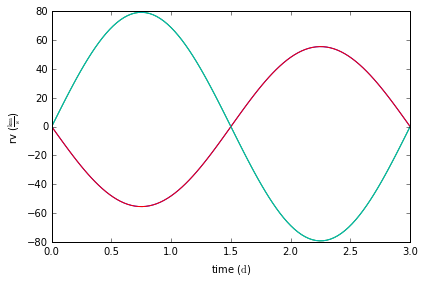

In [22]:
axs, artists = b['rv01@phoebemodel'].plot()
axs, artists = b['rv01@pdmodel'].plot()

And also plot the residuals of both the primary and secondary RVs

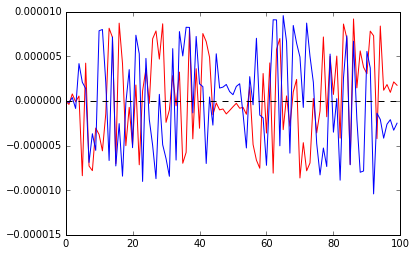

In [23]:
artist, = plt.plot(b.get_value('rv@rv01@primary@phoebemodel') - b.get_value('rv@rv01@primary@pdmodel'), color='r')
artist, = plt.plot(b.get_value('rv@rv01@secondary@phoebemodel') - b.get_value('rv@rv01@secondary@pdmodel'), color='b')
artist = plt.axhline(0.0, linestyle='dashed', color='k')